In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
# import plotly.express as px

In [3]:
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select *   from PlanseteVarle;"""
df = pd.read_sql_query(sql, con=SDB)

SDB.close()

for c in df.columns:
    print(c)

nuoroda
firstInfo
kaina
buvusiKaina
gamintojas
ekrano įstrižainė
operacinė sistema
vidinė atmintis (gb)
atmintis (ram) (gb)
ypatybės
atminties kortelė
spalva
modelio pavadinimas
modelis
procesoriaus modelis
procesoriaus dažnis
ekrano dydis
ekrano raiška
gylis
įmontuotas mikrofonas
plotis
pridedama klaviatūra
infraraudonųjų spindulių prievadas
aukščio
bluetooth
sim kortelės palaikymas
operatyvioji atmintis
ekrano tipas
skambinimo parinktis
usb
gps navigacija
priekinė kamera
pc002 procesorius
korpuso medžiaga
akumuliatoriaus talpa
hdmi
matmenys
pc006 vaizdo įrašas
branduolių skaičius
svorio
disko atmintis
bevielis internetas
planšetinio kompiuterio tipas
serija
pirštų atspaudų skaitytuvas
nfc
ausinių prijungimas
mobiliojo ryšio duomenys
operatyvioji ram atmintis
svoris
integruoti jutikliai
papildomi priedai
pagrindinė kamera
vidinės atminties dydis
atminties kortelių skaitytuvas
įkrovimas iš usb jungties
procesoriaus šeima
vidinė atmintis
sim kortelė
aukštis
įdiegta ram atmintis
cpu dažn

In [4]:
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina,
gamintojas
from PlanseteVarle;"""
df = pd.read_sql_query(sql, con=SDB)

SDB.close()
df.head()

,kaina,gamintojas
0,219,Lenovo
1,119,Lenovo
2,177,Lenovo
3,122,Lenovo
4,389,Samsung


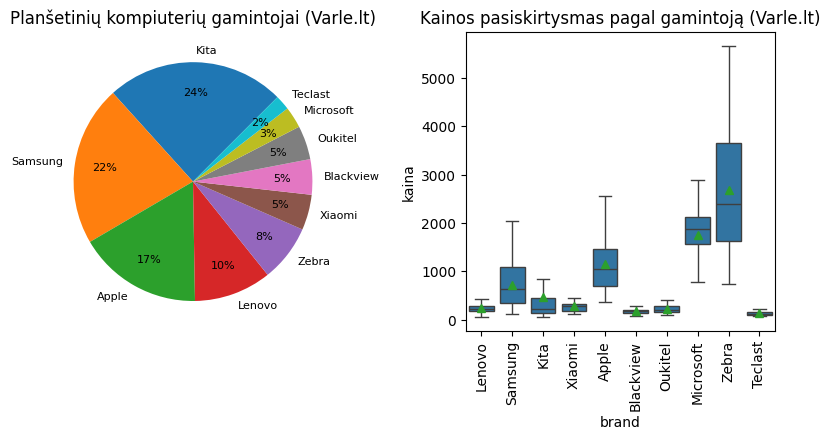

In [5]:
top = df['gamintojas'].value_counts().head(9).index.tolist()

df['brand'] = df['gamintojas'].apply(lambda x: x if x in top else 'Kita')
c = df['brand'].value_counts()
df['kaina'] = df['kaina'].str.extract('(\d+)')
df['kaina'] = df['kaina'].apply(lambda x: float(x))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))
# ax.pie(c.values, labels=c.index, autopct='%.f%%')
ax1.pie(c.values, 
        labels=c.index, 
        autopct='%.f%%',
        textprops={'fontsize':8, 'color': 'black'},
        startangle=45,
        # move the percentage inside the arcs
        pctdistance=0.75,
        # add spaces between the arcs
        # explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
        )
ax1.set_title('Planšetinių kompiuterių gamintojai (Varle.lt)')
sns.boxplot(data=df, x='brand', y='kaina', ax=ax2, showmeans=True, showfliers=False)
ax2.tick_params(axis='x', rotation=90)
ax2.set_title('Kainos pasiskirtysmas pagal gamintoją (Varle.lt)')
plt.tight_layout()
plt.show()

In [6]:
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina,
gamintojas
from PlanseteVarle;"""
df = pd.read_sql_query(sql, con=SDB)

SDB.close()
df['kaina'] = df['kaina'].str.extract('(\d+)')
df['kaina'] = df['kaina'].apply(lambda x: float(x))

In [7]:
c = df['gamintojas'].value_counts()
c

gamintojas
Samsung      195
Apple        151
Lenovo        94
Zebra         69
Blackview     43
            ... 
HP             1
Acer           1
Elo            1
NORDIC         1
Renewda        1
Name: count, Length: 62, dtype: int64

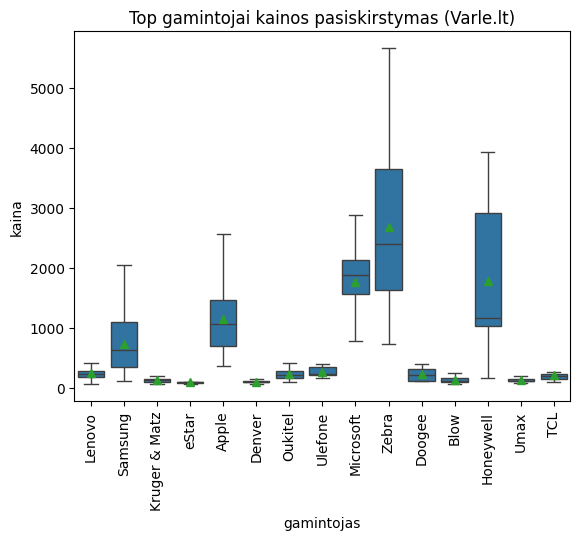

In [8]:
brand_counts = df['gamintojas'].value_counts()
brands_to_plot = brand_counts[brand_counts > 5].index

df_gamintojas = df[df['gamintojas'].isin(brands_to_plot)][['kaina', 'gamintojas']]
# Calculate the average price per brand
average_price_per_brand = df_gamintojas.groupby('gamintojas')['kaina'].mean().reset_index()
avg_price_sorted = average_price_per_brand.sort_values(by='kaina', ascending=True)
top5_low = avg_price_sorted['gamintojas'].head(5).tolist()
avg_price_sorted = average_price_per_brand.sort_values(by='kaina', ascending=False)
top5_high = avg_price_sorted['gamintojas'].head(5).tolist()
# print(top5_high)
# print(top5_low)
# # Find the median of the average prices
median_avg_price = average_price_per_brand['kaina'].median()
# print(median_avg_price)

# Find the 5 brands whose average prices are closest to the median
average_price_per_brand['price_diff_from_median'] = (average_price_per_brand['kaina'] - median_avg_price).abs()
top_5_middle_avg = average_price_per_brand.sort_values(by='price_diff_from_median').head(5)
top5_middle = top_5_middle_avg['gamintojas'].head(5).tolist()
# print(top5_middle)
top_brands = top5_high + top5_middle + top5_low
# print(top_brands)




df_brand = df_gamintojas[df_gamintojas['gamintojas'].isin(top_brands)]
df_brand.head()
sns.boxplot(data=df_brand, x='gamintojas', y='kaina', showmeans=True, showfliers=False)
plt.tick_params(axis='x', rotation=90)
plt.title('Top gamintojai kainos pasiskirstymas (Varle.lt)')
plt.show()


In [9]:
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina,
`ekrano įstrižainė`,
`ekrano dydis`,
`ekrano dydis (coliais)`,
`ekranas – įstrižainė (")`,
`įstrižainės ekranas`,
`ekrano dydis [coliais]`
from PlanseteVarle;"""
df = pd.read_sql_query(sql, con=SDB)

SDB.close()
df['kaina'] = df['kaina'].str.extract('(\d+)')
df['kaina'] = df['kaina'].apply(lambda x: float(x))
df.head()

,kaina,ekrano įstrižainė,ekrano dydis,ekrano dydis (coliais),"ekranas – įstrižainė ("")",įstrižainės ekranas,ekrano dydis [coliais]
0,219.0,11.0,None,None,None,None,None
1,119.0,10.1,None,None,None,None,None
2,177.0,"11"" - 11,9","11""",None,None,None,None
3,122.0,9.0,None,None,None,None,None
4,389.0,"10"" - 10,9","10,9""",None,None,None,None


In [10]:
for col in df.columns:
    if col != 'kaina':
        df['ekrano įstrižainė'] = df['ekrano įstrižainė'].fillna(df[col])

df.dropna(subset='ekrano įstrižainė', inplace=True)

def set_size(x):
    if 'cm' in x:
        size_cm = float(x.split(' ')[0].replace(',', '.'))
        coliai = round(size_cm /2.54, 1)
        return coliai
    else:
        return x
    
df['ekrano įstrižainė'] = df['ekrano įstrižainė'].apply(set_size)

df['ekrano įstrižainė'] = df['ekrano įstrižainė'].str.extract('(\d+)')
df['ekrano įstrižainė'] = df['ekrano įstrižainė'].apply(lambda x: float(x))
dfe = df[['kaina','ekrano įstrižainė' ]]
dfe_gr = dfe.groupby('ekrano įstrižainė').mean(numeric_only=True).reset_index()

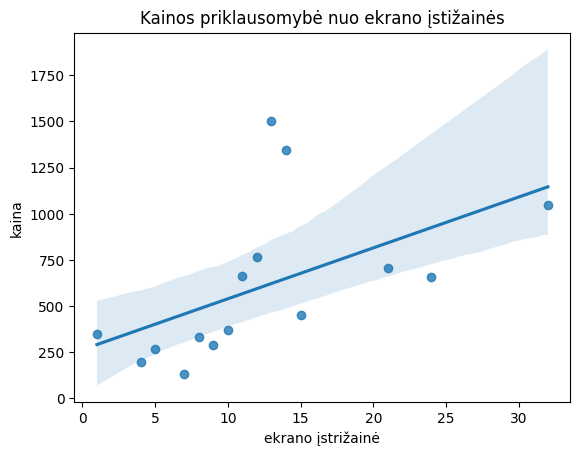

In [11]:
fig, ax = plt.subplots()
sns.regplot(data=dfe_gr[dfe_gr['ekrano įstrižainė'] < 40], x='ekrano įstrižainė', y='kaina')
plt.title('Kainos priklausomybė nuo ekrano įstižainės')
plt.show()

In [30]:
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina,
`Ekrano įstrižainė:`,
`Prekės ženklas:`
from PlansetePigu;"""
dfp = pd.read_sql_query(sql, con=SDB)
dfp.dropna(subset='Ekrano įstrižainė:', inplace=True)
dfp.head()

,kaina,Ekrano įstrižainė:,Prekės ženklas:
0,159.00,11'' (~27.9 cm),Samsung
1,154.95,11'' (~27.9 cm),XIAOMI
2,147.00,"11"" (27.9 cm)",XIAOMI
3,159.00,"11"" (27.9 cm)",XIAOMI
4,218.00,"12.1""",XIAOMI


In [31]:
dfp['Ekrano įstrižainė:'] = dfp['Ekrano įstrižainė:'].str.extract('(\d+)')
dfp['Ekrano įstrižainė:'] = dfp['Ekrano įstrižainė:'].apply(lambda x: float(x))
dfp_gr = dfp.groupby('Ekrano įstrižainė:').mean(numeric_only=True).reset_index()

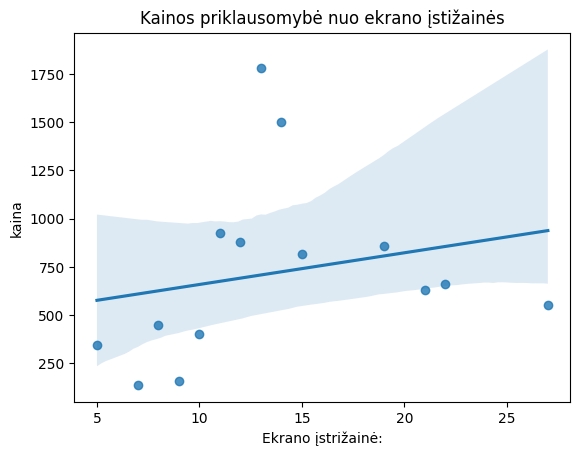

In [32]:
fig, ax = plt.subplots()
sns.regplot(data=dfp_gr, x='Ekrano įstrižainė:', y='kaina')
plt.title('Kainos priklausomybė nuo ekrano įstižainės')
plt.show()

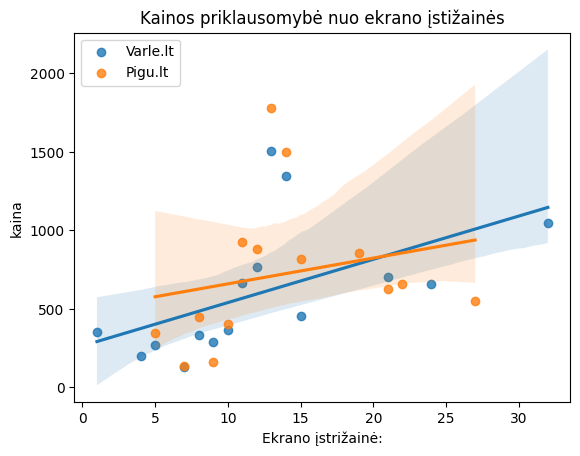

In [34]:
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina,
`ekrano įstrižainė`,
`ekrano dydis`,
`ekrano dydis (coliais)`,
`ekranas – įstrižainė (")`,
`įstrižainės ekranas`,
`ekrano dydis [coliais]`
from PlanseteVarle;"""
df = pd.read_sql_query(sql, con=SDB)

sql2="""select kaina,
`Ekrano įstrižainė:`,
`Prekės ženklas:`
from PlansetePigu;"""
dfp = pd.read_sql_query(sql2, con=SDB)

SDB.close()
# varle
df['kaina'] = df['kaina'].str.extract('(\d+)')
df['kaina'] = df['kaina'].apply(lambda x: float(x))
for col in df.columns:
    if col != 'kaina':
        df['ekrano įstrižainė'] = df['ekrano įstrižainė'].fillna(df[col])

df.dropna(subset='ekrano įstrižainė', inplace=True)

def set_size(x):
    if 'cm' in x:
        size_cm = float(x.split(' ')[0].replace(',', '.'))
        coliai = round(size_cm /2.54, 1)
        return coliai
    else:
        return x
    
df['ekrano įstrižainė'] = df['ekrano įstrižainė'].apply(set_size)

df['ekrano įstrižainė'] = df['ekrano įstrižainė'].str.extract('(\d+)')
df['ekrano įstrižainė'] = df['ekrano įstrižainė'].apply(lambda x: float(x))
dfe = df[['kaina','ekrano įstrižainė' ]]
dfe_gr = dfe.groupby('ekrano įstrižainė').mean(numeric_only=True).reset_index()

# pigu
dfp.dropna(subset='Ekrano įstrižainė:', inplace=True)
dfp['Ekrano įstrižainė:'] = dfp['Ekrano įstrižainė:'].str.extract('(\d+)')
dfp['Ekrano įstrižainė:'] = dfp['Ekrano įstrižainė:'].apply(lambda x: float(x))
dfp_gr = dfp.groupby('Ekrano įstrižainė:').mean(numeric_only=True).reset_index()

fig, ax = plt.subplots()
sns.regplot(data=dfe_gr[dfe_gr['ekrano įstrižainė'] < 40], x='ekrano įstrižainė', y='kaina', ax=ax, label='Varle.lt')
sns.regplot(data=dfp_gr, x='Ekrano įstrižainė:', y='kaina', ax=ax, label='Pigu.lt')
plt.title('Kainos priklausomybė nuo ekrano įstižainės')
plt.legend()
plt.show()

In [51]:
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina,
gamintojas,
`ekrano tipas`,
`ekrano technologija`
from PlanseteVarle;"""
df_with_dubs = pd.read_sql_query(sql, con=SDB)

SDB.close()
df = df_with_dubs.drop_duplicates()
df['kaina'] = df['kaina'].str.extract('(\d+)')
df['kaina'] = df['kaina'].apply(lambda x: float(x))
df['ekrano tipas'].fillna(df['ekrano technologija'])
# df.head()

0               None
1               None
2                IPS
3               None
4      IPS LCD, 90Hz
           ...      
892             None
893             None
894             None
895             None
896             None
Name: ekrano tipas, Length: 760, dtype: object

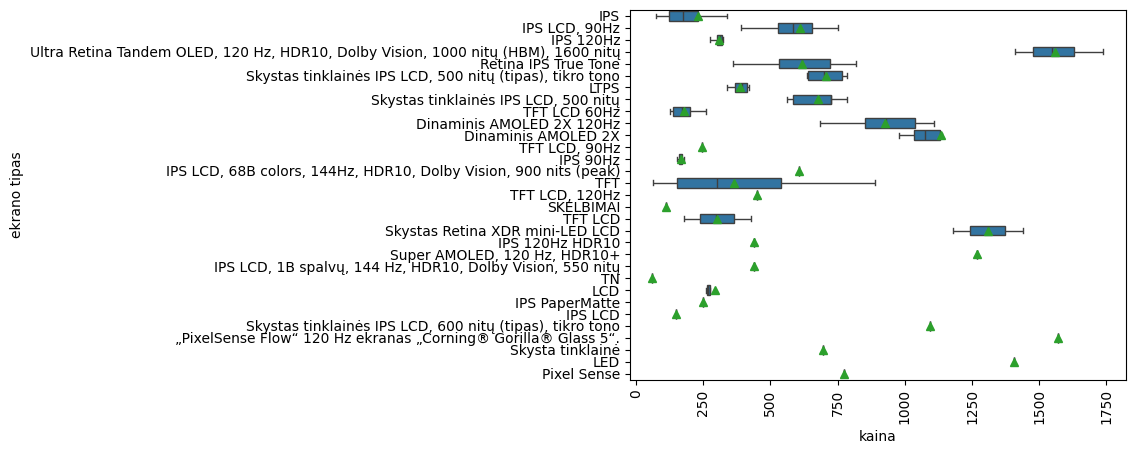

In [52]:
fig, ax = plt.subplots()
sns.boxplot(data=df, y='ekrano tipas', x='kaina', showmeans=True, showfliers=False, orient='h')
plt.tick_params(axis='x', rotation = 90)
plt.show()

In [47]:
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina,
`Prekės ženklas:`,
`Ekrano tipas:`
from PlansetePigu;"""
dfp_with_dubs = pd.read_sql_query(sql, con=SDB)

SDB.close()
dfp = dfp_with_dubs.drop_duplicates()
dfp.head()

,kaina,Prekės ženklas:,Ekrano tipas:
0,159.00,Samsung,TFT
1,154.95,XIAOMI,IPS LCD
2,147.00,XIAOMI,IPS-LCD
3,159.00,XIAOMI,IPS-LCD
4,218.00,XIAOMI,LCD


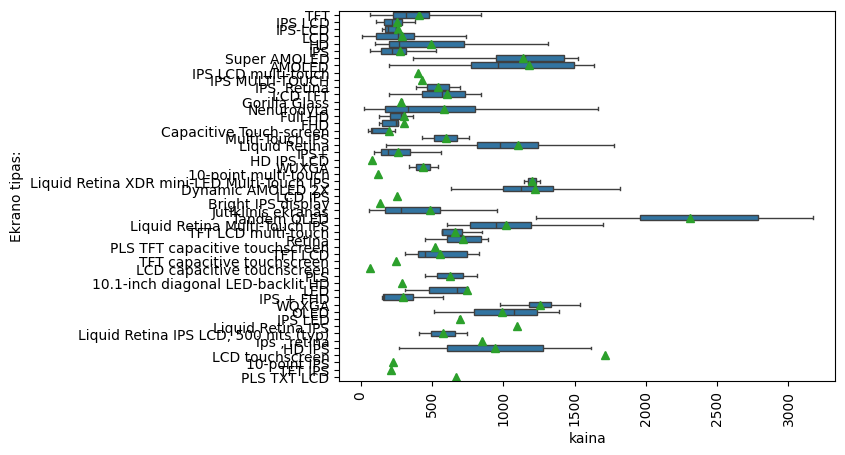

In [49]:
fig, ax = plt.subplots()
sns.boxplot(data=dfp, y='Ekrano tipas:', x='kaina', showmeans=True, showfliers=False, orient='h')
plt.tick_params(axis='x', rotation = 90)
plt.show()

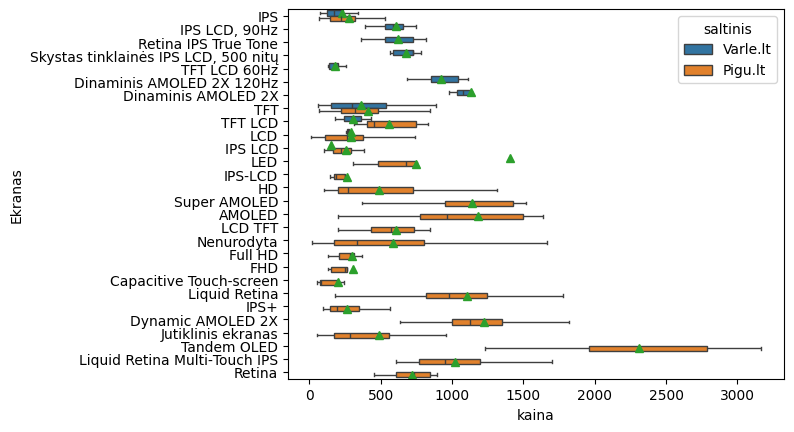

In [ ]:
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina,
gamintojas,
`ekrano tipas`,
`ekrano technologija`
from PlanseteVarle;"""
df_with_dubs = pd.read_sql_query(sql, con=SDB)

sql2="""select kaina,
`Prekės ženklas:`,
`Ekrano tipas:`
from PlansetePigu;"""
dfp_with_dubs = pd.read_sql_query(sql2, con=SDB)

SDB.close()
#  varle
df = df_with_dubs.drop_duplicates()
df['kaina'] = df['kaina'].str.extract('(\d+)')
df['kaina'] = df['kaina'].apply(lambda x: float(x))
df['ekrano tipas'].fillna(df['ekrano technologija'])
df['Ekranas'] = df['ekrano tipas']
df['saltinis'] = 'Varle.lt'
df_join = df[['kaina', 'Ekranas', 'saltinis']]
# df_join.head()

# pigu
dfp = dfp_with_dubs.drop_duplicates()
dfp['Ekranas'] = dfp['Ekrano tipas:']
dfp['saltinis'] = 'Pigu.lt'
dfp_join = dfp[['kaina', 'Ekranas', 'saltinis']]
# dfp_join.head()

# join tables
df_combined = pd.concat([df_join, dfp_join])
df_combined.dropna(subset='Ekranas', inplace=True)

types_counts = df_combined['Ekranas'].value_counts()
types_to_plot = types_counts[types_counts > 4].index

fig, ax = plt.subplots()
sns.boxplot(data=df_combined[df_combined['Ekranas'].isin(types_to_plot)], y='Ekranas', x='kaina', showmeans=True, showfliers=False, hue='saltinis', orient='h')
plt.show()

In [ ]:
# ekrano raiska

SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina,
gamintojas,
`ekrano raiška`,
raiška,
`ekrano raiška (pikseliais)`
from PlanseteVarle;"""
df_with_dubs = pd.read_sql_query(sql, con=SDB)

sql2="""select kaina,
`Prekės ženklas:`,
`Maksimali raiška:`
from PlansetePigu;"""
dfp_with_dubs = pd.read_sql_query(sql2, con=SDB)

SDB.close()
#  varle
df = df_with_dubs.drop_duplicates()
df['kaina'] = df['kaina'].str.extract('(\d+)')
df['kaina'] = df['kaina'].apply(lambda x: float(x))
for col in df.columns:
    if col not in ['kaina', 'gamintojas']:
        df['ekrano raiška'] = df['ekrano raiška'].fillna(df[col])
# df.head()
dfp = dfp_with_dubs.drop_duplicates()
# Pigu

In [95]:
dfp['ekrano raiška'] = dfp['Maksimali raiška:']

df['saltinis'] = 'Varle.lt'
dfp['saltinis'] = 'Pigu.lt'
df_join = df[['kaina', 'ekrano raiška', 'saltinis']]
dfp_join = dfp[['kaina', 'ekrano raiška', 'saltinis']]

# join tables
df_combined = pd.concat([df_join, dfp_join])
df_combined.dropna(subset='ekrano raiška', inplace=True)




In [93]:
c = df_combined['ekrano raiška'].value_counts()
c

ekrano raiška
1920 x 1200    108
1280 x 800     100
2000 x 1200     73
Nenurodyta      71
2560 x 1600     57
              ... 
3000x1876        1
2266x1488        1
1366 x 800       1
1024 x 784       1
1024 x 720       1
Name: count, Length: 76, dtype: int64

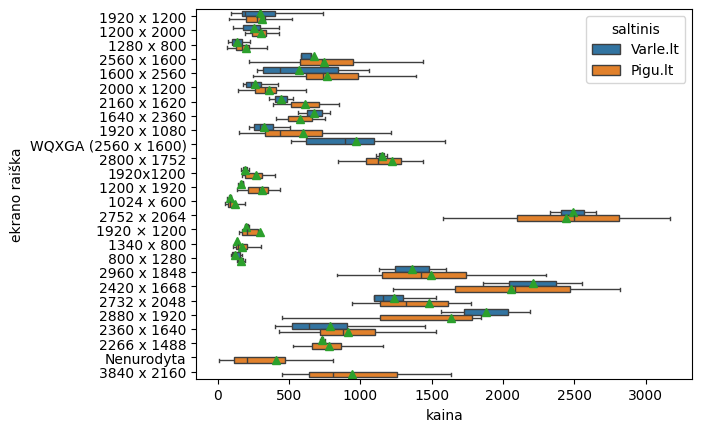

In [97]:
types_counts = df_combined['ekrano raiška'].value_counts()
types_to_plot = types_counts[types_counts > 9].index

fig, ax = plt.subplots()
sns.boxplot(data=df_combined[df_combined['ekrano raiška'].isin(types_to_plot)], y='ekrano raiška', x='kaina', showmeans=True, showfliers=False, hue='saltinis', orient='h')
plt.show()

In [111]:
# atmintis
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina,
gamintojas,
`vidinė atmintis (gb)`,
`disko atmintis`,
`vidinės atminties dydis`,
`vidinė atmintis`,
`vidinės atminties dydis [gb]`
from PlanseteVarle;"""
df_with_dubs = pd.read_sql_query(sql, con=SDB)

sql2="""select kaina,
`Vidinė atmintis:`,
`Prekės ženklas:`
from PlansetePigu;"""
dfp_with_dubs = pd.read_sql_query(sql2, con=SDB)

SDB.close()
#  varle

df = df_with_dubs.drop_duplicates()
df['kaina'] = df['kaina'].str.extract('(\d+)')
df['kaina'] = df['kaina'].apply(lambda x: float(x))
for col in df.columns:
    if col not in ['kaina', 'gamintojas']:
        df['vidinė atmintis (gb)'] = df['vidinė atmintis (gb)'].fillna(df[col])
df.dropna(subset='vidinė atmintis (gb)', inplace=True)
df['vidinė atmintis (gb)'] = df['vidinė atmintis (gb)'].str.extract('(\d+)')
df['vidinė atmintis (gb)'] = df['vidinė atmintis (gb)'].apply(lambda x: float(x))

# pigu

dfp = dfp_with_dubs.drop_duplicates()
dfp['Vidinė atmintis:'] = dfp['Vidinė atmintis:'].str.extract('(\d+)')
dfp['Vidinė atmintis:'] = dfp['Vidinė atmintis:'].apply(lambda x: float(x))
dfp.dropna(subset='Vidinė atmintis:', inplace=True)

In [112]:
df_memory = df[['kaina', 'vidinė atmintis (gb)']]
df_memory_gr = df_memory.groupby('vidinė atmintis (gb)').mean(numeric_only=True).reset_index()

dfp_memory = dfp[['kaina', 'Vidinė atmintis:']]
dfp_memory_gr = dfp_memory.groupby('Vidinė atmintis:').mean(numeric_only=True).reset_index()

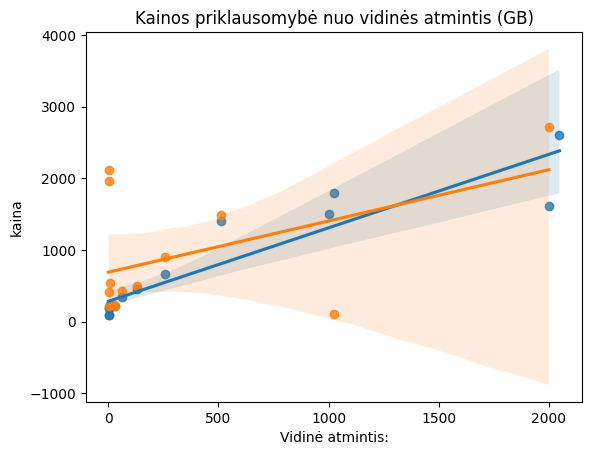

In [114]:
fig, ax = plt.subplots()
sns.regplot(data=df_memory_gr, x='vidinė atmintis (gb)', y='kaina', ax=ax, label='Varle.lt')
sns.regplot(data=dfp_memory_gr, x='Vidinė atmintis:', y='kaina', ax=ax, label='Pigu.lt')
plt.title('Kainos priklausomybė nuo vidinės atmintis (GB)')
plt.show()

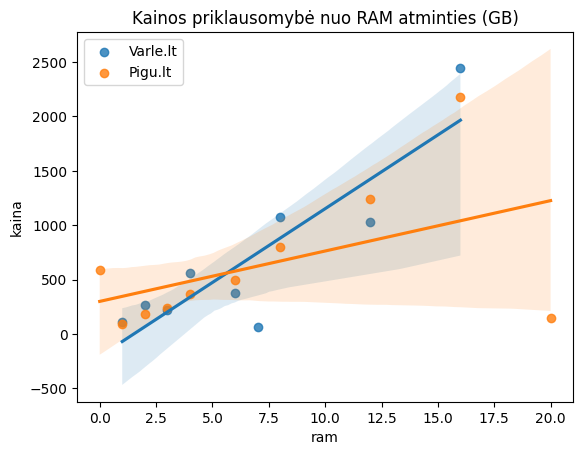

In [143]:
#  RAM
# atmintis
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina,
gamintojas,
`atmintis (ram) (gb)`,
`operatyvioji atmintis`,
`operatyvioji ram atmintis`,
`įdiegta ram atmintis`,
`darbinė atmintis (ram)`,
`operacinės atminties dydis [gb]`,
`atmintis (ram)`

from PlanseteVarle;"""
df_with_dubs = pd.read_sql_query(sql, con=SDB)

sql2="""select kaina,
`Operatyvinė atmintis (RAM):`,
`Prekės ženklas:`
from PlansetePigu;"""
dfp_with_dubs = pd.read_sql_query(sql2, con=SDB)

SDB.close()
#  varle

df = df_with_dubs.drop_duplicates()
df['kaina'] = df['kaina'].str.extract('(\d+)')
df['kaina'] = df['kaina'].apply(lambda x: float(x))
for col in df.columns:
    if col not in ['kaina', 'gamintojas']:
        df['atmintis (ram) (gb)'] = df['atmintis (ram) (gb)'].fillna(df[col])
df.dropna(subset='atmintis (ram) (gb)', inplace=True)
df['atmintis (ram) (gb)'] = df['atmintis (ram) (gb)'].str.extract('(\d+)')
df['atmintis (ram) (gb)'] = df['atmintis (ram) (gb)'].apply(lambda x: float(x))


dfp = dfp_with_dubs.drop_duplicates()
dfp['Operatyvinė atmintis (RAM):'] = dfp['Operatyvinė atmintis (RAM):'].str.extract('(\d+)')
dfp['Operatyvinė atmintis (RAM):'] = dfp['Operatyvinė atmintis (RAM):'].apply(lambda x: float(x))
dfp.dropna(subset='Operatyvinė atmintis (RAM):', inplace=True)
dfp['ram'] = dfp['Operatyvinė atmintis (RAM):'].apply(lambda x: np.floor(x/1000))

df_memory = df[['kaina', 'atmintis (ram) (gb)']]
df_memory_gr = df_memory.groupby('atmintis (ram) (gb)').mean(numeric_only=True).reset_index()

dfp_memory = dfp[['kaina', 'ram']]
dfp_memory_gr = dfp_memory.groupby('ram').mean(numeric_only=True).reset_index()
fig, ax = plt.subplots()
sns.regplot(data=df_memory_gr[df_memory_gr['atmintis (ram) (gb)'] < 20], x='atmintis (ram) (gb)', y='kaina', ax=ax, label='Varle.lt')
sns.regplot(data=dfp_memory_gr, x='ram', y='kaina', ax=ax, label='Pigu.lt')
plt.title('Kainos priklausomybė nuo RAM atminties (GB)')
plt.legend()
plt.show()

In [139]:
dfp.head()

,kaina,Operatyvinė atmintis (RAM):,Prekės ženklas:,ram
0,159.00,4000.0,Samsung,4.0
1,154.95,4000.0,XIAOMI,4.0
2,147.00,4000.0,XIAOMI,4.0
3,159.00,8000.0,XIAOMI,8.0
4,218.00,6000.0,XIAOMI,6.0
